# BIKE SHARING CASE STUDY

## <font color="blue">Introduction
>Bike sharing system is a shared transport service, in which bikes are made available for shared use to a individuals on a short term basis for a price or fee. Many bike sharing systems allows customers to borrow a bike from one dock and return it at another dock of a same system. There are many bike sharing companies like BLOOM, OFO, Mobike, BoomBikes, Bounce, joyride, evemo, etc. in the world offering services in major metro cities.

## <font color="blue">Problem Statement
> A US bike sharing provider BoomBikes recently sufferered from revenue dips due to the ongoing corona pandemic.Because of the unexpected loss, the company is finding it difficult to sustain in the current market scenario. so it has decided to come up with the mindful business plan so that they can able to accelerate their revenue once the pandemic comes to an end and also boost the economy.
>    
> The company BoomBikes wanted to improve their business, they actually wanted to understand the demand of the shared bikes among the people once the pandemic comes to an end. They have planned this to prepare themselves to cater to the people's need and need to stand out among the competetors and to make huge profits.
>

## <font color="blue">Business Objectives

>The company specifically need to understand the factors affecting the demand of these shared bikes. They wants to find:
> - Which variables are significant in predicting the demand of the shared bikes
> - How well the variables describe the demand of the shared bikes
>    
>We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demand varies with different features

## <font color="blue">Data Understanding
    
>### 'day.csv'
> It contains the meterological informations, timing details and people's styles.
>    
> - instant: record index
> - dteday : date
> - season : season (1:spring, 2:summer, 3:fall, 4:winter)
> - yr : year (0: 2018, 1:2019)
> - mnth : month ( 1 to 12)
> - holiday : weather day is a holiday or not
> - weekday : day of the week
> - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
> + weathersit : 
	1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> - temp : temperature in Celsius
> - atemp: feeling temperature in Celsius
> - hum: humidity
> - windspeed: wind speed
> - casual: count of casual users
> - registered: count of registered users
> - cnt: count of total rental bikes including both casual and registered

## <font color="blue">Data Preparation

### Importing libraries

In [1]:
# Importing basic libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings("ignore")

### Customizing Settings

In [2]:
# Customizing the settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Importing Data

In [3]:
# Importing the data
bike = pd.read_csv("day.csv", index_col=0)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Cleaning

In [4]:
# Analyzing the shape of the data
print("The shape of the bike sharing data is",bike.shape)

The shape of the bike sharing data is (730, 15)


In [5]:
# Checking the informations
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [6]:
# Checking for null values in all the columns
round((bike.isnull().sum()/len(bike))*100,2).sort_values(ascending=False)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no missing values in any of the rows or columns of the dataset

In [7]:
# Checking the unique values in the columns of the dataset
bike.apply(lambda x:len(x.unique()))

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
# Checking for duplicates
bike[bike.duplicated()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,


No duplicate records are there in the dataset

In [9]:
# Changing the dteday column into datetime category to extract the day
bike["dteday"] = pd.to_datetime(bike["dteday"],format = "%d-%m-%Y")

# Extracting the weekday and day from dteday column
bike["Day_of_month"] = pd.DatetimeIndex(bike["dteday"]).day
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day_of_month
instant,,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


### Removing Redundant columns

#### 1. dteday column:
> - Already all the required informations are extracted from this column and new columns are created like year, month, day and the details of the day. Thus we can drop this column too.
#### 2. atemp column:
> - The atemp column(feel like temperature) is depend on the air temperature. thus it will be highly correlated. Thus we can drop this column.
#### 3. casual and registered columns:
> - Both these columns contains count of bike booked by the customers who casually using without registering and those who have registered already. However we have an another column which have total counts of both which we will be using as dependent variable. so thus we can drop these two columns.

In [10]:
# Dropping dteday, atemp, causal, and registered column
bike.drop(["dteday","atemp","casual","registered"], axis=1,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    int64  
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    int64  
 7   temp          730 non-null    float64
 8   hum           730 non-null    float64
 9   windspeed     730 non-null    float64
 10  cnt           730 non-null    int64  
 11  Day_of_month  730 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 74.1 KB


In [11]:
# Lets rename the column name for our convenience
bike.rename(columns={"yr":"Year","mnth":"Month","weathersit":"Weather","temp":"Temperature","hum":"Humidity","cnt":"Count"},
           inplace=True)
bike.columns = bike.columns.str.strip().str.capitalize()
bike.index.name = "Index"
bike.columns.name = "Features"

In [12]:
bike.head()

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month
Index,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
2,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2
3,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,3
4,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,4
5,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,5


### Handling Data Types

In [13]:
# Checking the data types of the dataset
bike.dtypes

Features
Season            int64
Year              int64
Month             int64
Holiday           int64
Weekday           int64
Workingday        int64
Weather           int64
Temperature     float64
Humidity        float64
Windspeed       float64
Count             int64
Day_of_month      int64
dtype: object

We know that the columns Season, Year, Month, Holiday, Weekday, Workingday, Weather are categorical variables but expressed as integer. thus we need to change it into categorical types. So that we can create dummy variables.

In [14]:
# Converting the columns into categorical types
bike_cat = ["Season","Month","Holiday","Weekday","Workingday","Weather"]

for cols in bike_cat:
    bike[cols] = bike[cols].astype("category")
    
print(bike.dtypes)

Features
Season          category
Year               int64
Month           category
Holiday         category
Weekday         category
Workingday      category
Weather         category
Temperature      float64
Humidity         float64
Windspeed        float64
Count              int64
Day_of_month       int64
dtype: object


In [15]:
# Giving exact names for some categorical column instead of number for easy interpretation
bike["Season"] = bike["Season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike["Year"] = bike["Year"].replace({0: "2018", 1:"2019"})
bike["Weekday"] = bike["Weekday"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",
                                           6:"Sat"})
bike["Month"] = bike["Month"].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
                                      7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
bike.head(3)

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month
Index,,,,,,,,,,,,
1,spring,2018,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,985,1
2,spring,2018,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,801,2
3,spring,2018,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,1349,3


### Sanity Checks

In [16]:
# Neither weekends nor holidays are working days
bike[((bike["Holiday"]==1) | (bike["Weekday"].isin(["Sat","Sun"]))) & (bike["Workingday"] == 1) ]


Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month
Index,,,,,,,,,,,,


No holidays or weekends are represented as working day.

### Data Visualization

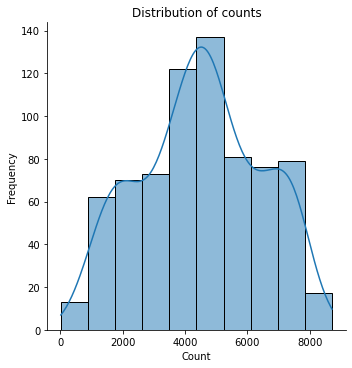

In [17]:
# Checking the distribution of counts
sns.displot(bike["Count"], bins=10, kde=True)
plt.title("Distribution of counts")
plt.ylabel("Frequency")
plt.show()

#### <font color="blue">Inference from the plot
> - The distribution of the counts is almost normally distributed.
> - On average around 4500 customers utilizing the bike service per day.

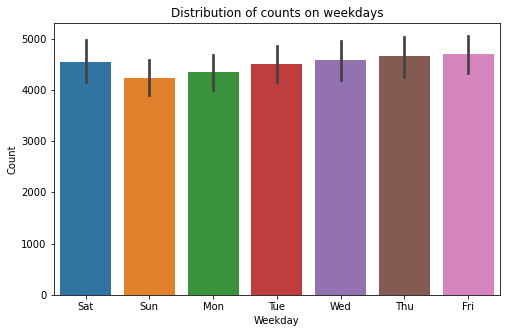

In [18]:
# Checking the counts on weekdays 
plt.figure(figsize=[8,5])
sns.barplot(data=bike, x="Weekday", y=bike["Count"])
plt.title("Distribution of counts on weekdays")
plt.show()

#### <font color="blue">Inference from the plot
> - The usage of bike is less on sundays.

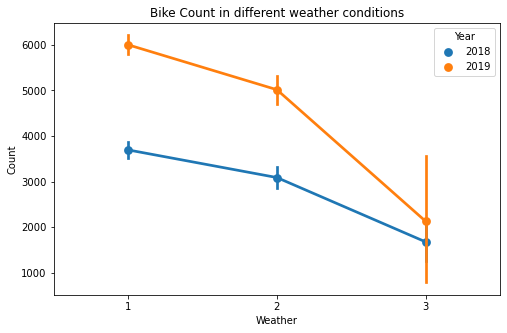

In [19]:
# Checking the counts with respect to weather
fig, ax = plt.subplots(figsize=[8,5])
sns.pointplot(data=bike, x="Weather", y="Count", hue="Year")
ax.set(title="Bike Count in different weather conditions")
plt.show()

#### <font color="blue">Inference from the plot
> - when there is light snow, light rain, thunderstorm the number of bike users decreases.
> - From the data it is evident that, when there is heavy rain, ice pallets, snow and fog, no one uses the bike.
> - The number of users were increased by 2019 with significant increase.

Text(0.5, 1.0, 'Counts on Holiday')

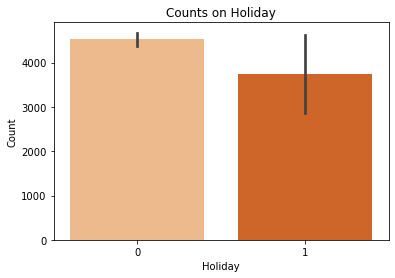

In [20]:
# Checking the distribution on holidays
plt.figure(figsize=[6,4])
sns.barplot(data=bike, x="Holiday", y="Count",palette="Oranges")
plt.title("Counts on Holiday")

#### <font color="blue">Inference from the plot
> - The number of bike users are less on holidays.

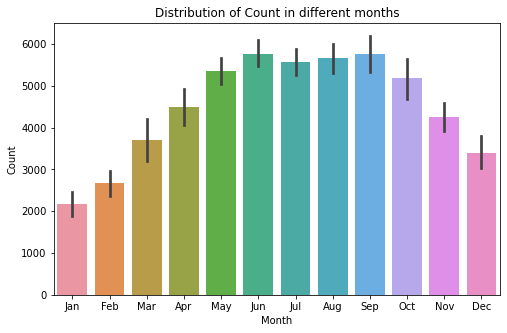

In [21]:
# Checking the distribution of counts on different months
plt.figure(figsize=[8,5])
sns.barplot(data=bike, x="Month", y="Count")
plt.title("Distribution of Count in different months")
plt.show()

#### <font color="blue">Inference from the plot
> - The number of counts is very less on january month.
> - Most counts are in the month june to sep.

#### <font color="blue">Derived columns:
> ##### 1. Part_month:
> - part of the month whether it is first half or second half or third half
> - first half(first-10), second half(11-20), third half(20-last)

In [22]:
# Creating a new variable part_month
bike["Part_month"] = pd.cut(bike["Day_of_month"], bins=[0,10,20,35], labels=["First_half","Second_half","Third_half"])

# Deleting the Day_of_month column, as we created a bin out of it.
bike.drop("Day_of_month", axis=1, inplace=True)

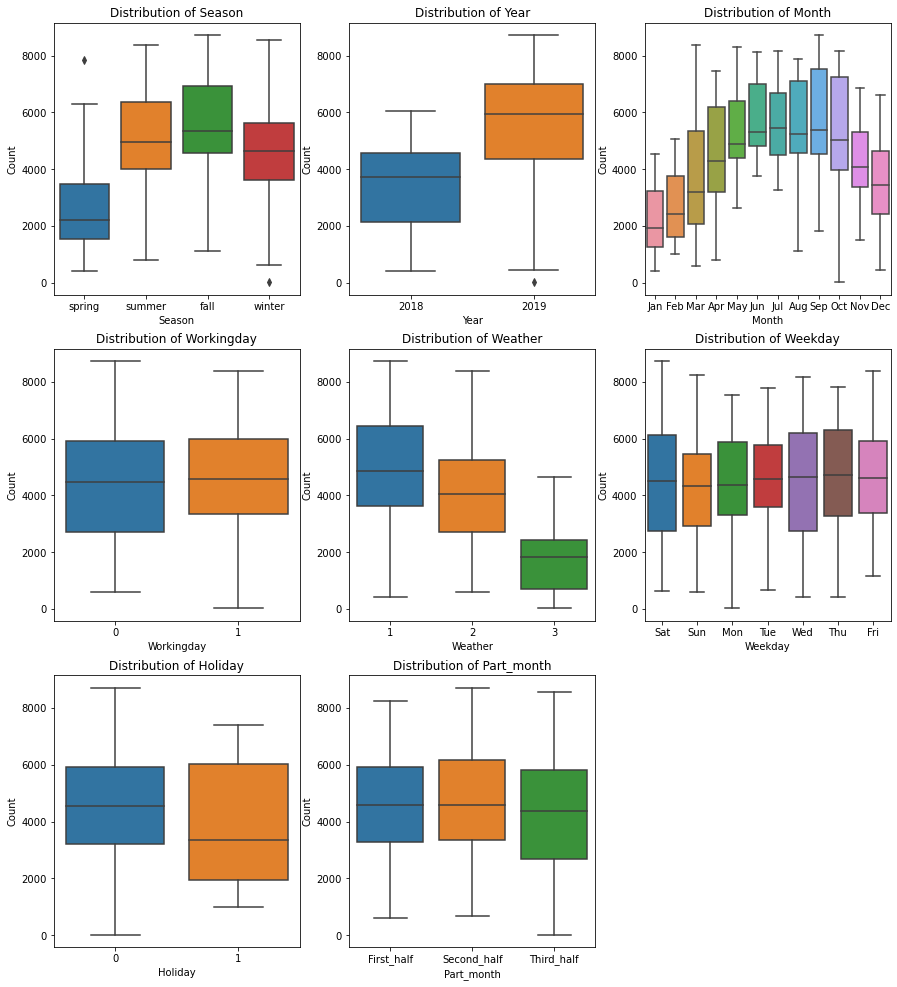

In [23]:
# Creating a function for boxplot
def boxplot(a,b):
    plt.subplot(3,3,a)
    plt.title("Distribution of"+" "+b)
    sns.boxplot(data=bike, x=b, y="Count")

# Plotting the boxplot for all categorical variables
plt.figure(figsize=[15,17])
Cat_bike = ["Season","Year","Month","Workingday","Weather","Weekday","Holiday","Part_month"]
ax = 1
for i in Cat_bike:
    boxplot(ax,i)
    ax+=1   

#### <font color="blue">Inference from the plot
> - The number of bike users in spring is very low.
> - The count has increased significantly in 2019.
> - The count is less on holidays
> - The count is less on sundays
> - The number of bike users are more in clear, few clouds climate.
> - From the distribution of part_month it is evident that in the third half the count is less.

KeyError: 'Day_of_month'

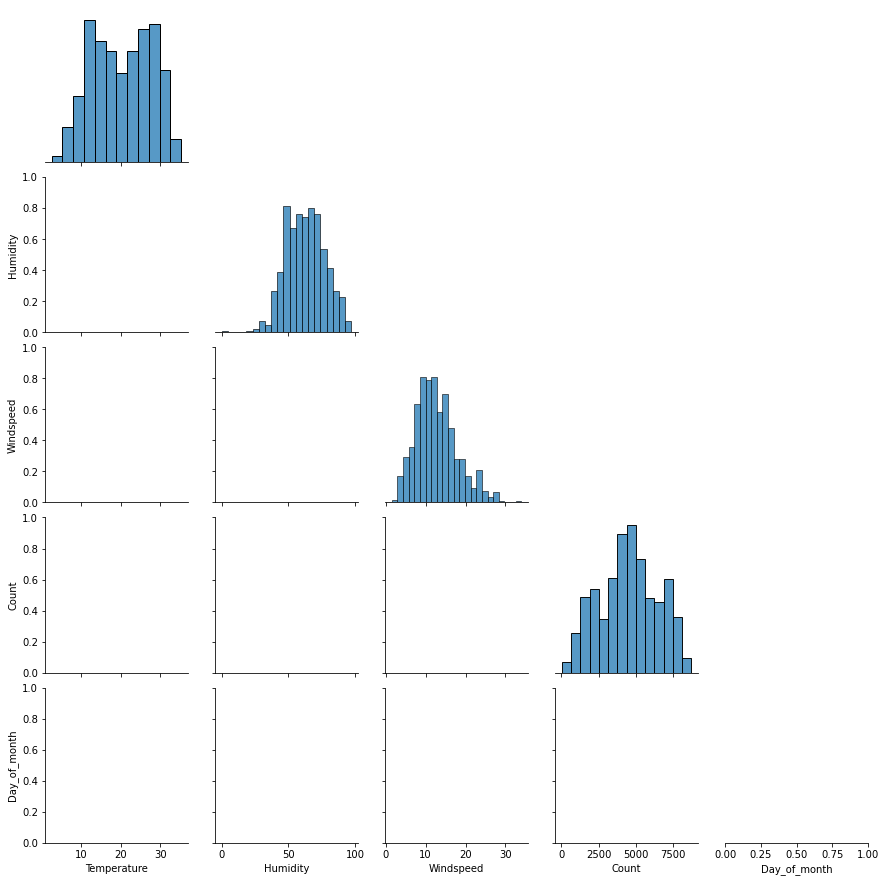

In [24]:
# Plotting pairplot for continuous variable
sns.pairplot(data=bike, vars=["Temperature","Humidity","Windspeed","Count","Day_of_month"],  corner=True, kind="reg",
            plot_kws= {"line_kws":{"color":"red"}})
plt.show()

#### <font color="blue">Inference from the plot
> - There is high positive correlation between temperature and count.
> - There is negative correlation between count and windspeed.
> - Humidity and windspeed are negatively correlated.

In [ ]:
# Plotting heat map of continuos variable
sns.heatmap(bike.corr(), cmap="Greens", annot=True)
plt.title("Heat map of continuous variables")
plt.show()

#### <font color="blue">Inference from the plot
> - From the heat map it is evident that there is high positive correlation between temperature and count.

### Data Preparation